|||
|-|-|
|Name|De Guzman, Aero Kent|
|Course Code|CPE313|
|Course Section|CPE32S3|
|Course Title|Advanced Machine Learning and Deep Learning|
|Date Performed|09/02/26|
|Date Submitted|09/02/26|
|Instructor|Engr. Neil Barton James Matira|

# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
# from keras.preprocessing.image import ImageDataGenerator >> ImportError
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [ ]:
x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


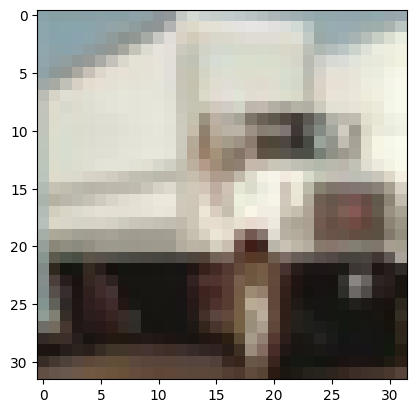

In [ ]:
print(y_train[444])
plt.imshow(x_train[444]);

In [ ]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [ ]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Convert to float and scale the datasets

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [ ]:
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [ ]:
batch_size = 32

# opt = keras.optimizers.RMSprop(lr=0.0005) >> ValueError
opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1_hist = model_1.fit(x_train, y_train,
                           batch_size=batch_size,
                           epochs=15,
                           validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.2954 - loss: 1.9088 - val_accuracy: 0.4811 - val_loss: 1.4584
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4665 - loss: 1.4906 - val_accuracy: 0.4607 - val_loss: 1.5170
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5152 - loss: 1.3610 - val_accuracy: 0.5405 - val_loss: 1.2801
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5432 - loss: 1.2855 - val_accuracy: 0.5836 - val_loss: 1.1646
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5646 - loss: 1.2293 - val_accuracy: 0.5819 - val_loss: 1.1897
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5760 - loss: 1.2032 - val_accuracy: 0.5927 - val_loss: 1.1501
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5872 - loss: 1.1762 - val_accuracy: 0.5903 - val_loss: 1.1459
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5961 - loss: 1.1461 -

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [ ]:
# * Build a more complicated model with the following pattern:
# Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification
# * Use strides of 1 for all convolutional layers.
from keras import backend as K
from keras.layers import Input

K.clear_session()
model_sup = Sequential()

# Convolutional
model_sup.add(Input(shape=x_train.shape[1:]))
model_sup.add(Conv2D(32, (5, 5), strides = (1,1), padding='same'))
model_sup.add(Activation('relu'))

# Convolutional
model_sup.add(Conv2D(32, (5, 5), strides = (1,1)))
model_sup.add(Activation('relu'))

# MaxPool
model_sup.add(MaxPooling2D(pool_size=(2, 2)))
model_sup.add(Dropout(0.25))

# Convolutional
model_sup.add(Conv2D(32, (5, 5), strides = (1,1)))
model_sup.add(Activation('relu'))

# Convolutional
model_sup.add(Conv2D(32, (5, 5), strides = (1,1)))
model_sup.add(Activation('relu'))

# MaxPool
model_sup.add(MaxPooling2D(pool_size=(2, 2)))
model_sup.add(Dropout(0.25))

# Flatten
model_sup.add(Flatten())

# Dense
model_sup.add(Dense(512))
model_sup.add(Activation('relu'))
model_sup.add(Dropout(0.5))

# Final Classification
model_sup.add(Dense(num_classes))
model_sup.add(Activation('softmax'))

In [ ]:
# * Write the number of parameters of your model  and compare it to the previous model
model_sup.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,426 (907.91 KB)

 Trainable params: 232,426 (907.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# * Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

batch_size = 32
opt = keras.optimizers.RMSprop(learning_rate=0.0005)
model_sup.compile(loss = 'categorical_crossentropy',
                  optimizer = opt,
                  metrics=['accuracy'])

sup_hist = model_sup.fit(x_train, y_train,
                         batch_size=batch_size,
                         epochs=15,
                         validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.2831 - loss: 1.9207 - val_accuracy: 0.4535 - val_loss: 1.5805
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5093 - loss: 1.3671 - val_accuracy: 0.5728 - val_loss: 1.1973
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5761 - loss: 1.1968 - val_accuracy: 0.6296 - val_loss: 1.0546
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6138 - loss: 1.0996 - val_accuracy: 0.6345 - val_loss: 1.0631
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6382 - loss: 1.0395 - val_accuracy: 0.6611 - val_loss: 0.9722
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6567 - loss: 0.9932 - val_accuracy: 0.6711 - val_loss: 0.9554
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6688 - loss: 0.9691 - val_accuracy: 0.6686 - val_loss: 1.0003
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6775 - loss: 0.9390 

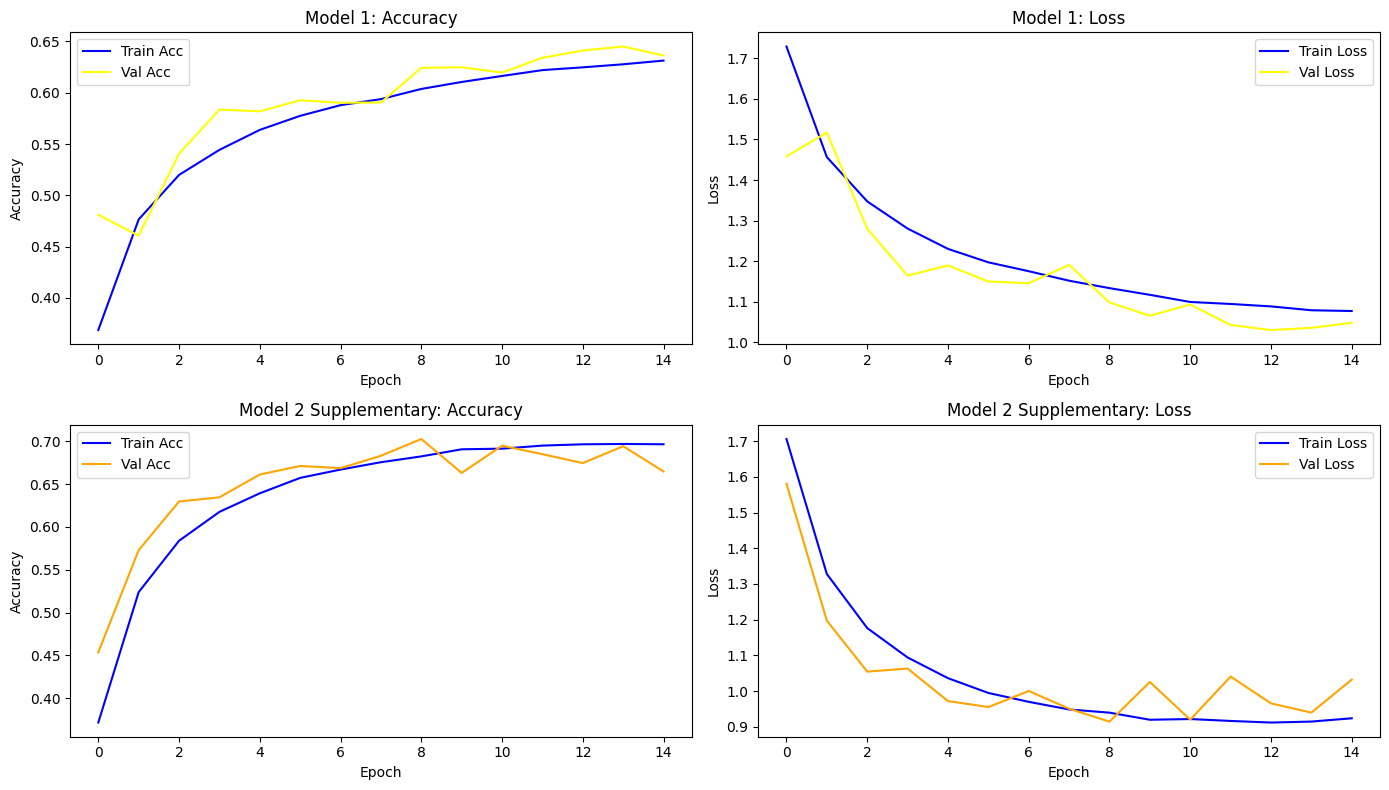

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

axs[0, 0].plot(model_1_hist.history['accuracy'], label='Train Acc', color='blue')
axs[0, 0].plot(model_1_hist.history['val_accuracy'], label='Val Acc', color='yellow')
axs[0, 0].set_title('Model 1: Accuracy')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

axs[0, 1].plot(model_1_hist.history['loss'], label='Train Loss', color='blue')
axs[0, 1].plot(model_1_hist.history['val_loss'], label='Val Loss', color='yellow')
axs[0, 1].set_title('Model 1: Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

axs[1, 0].plot(sup_hist.history['accuracy'], label='Train Acc', color='blue')
axs[1, 0].plot(sup_hist.history['val_accuracy'], label='Val Acc', color='orange')
axs[1, 0].set_title('Model 2 Supplementary: Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

axs[1, 1].plot(sup_hist.history['loss'], label='Train Loss', color='blue')
axs[1, 1].plot(sup_hist.history['val_loss'], label='Val Loss', color='orange')
axs[1, 1].set_title('Model 2 Supplementary: Loss')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
print("--- Model 1: Procedures ---")
print(f"Final Train Acc: {model_1_hist.history['accuracy'][-1]:.4f}")
print(f"Final Valid Acc: {model_1_hist.history['val_accuracy'][-1]:.4f}")
print(f"Final Valid Loss: {model_1_hist.history['val_loss'][-1]:.4f}")

print("\n--- Model 2: Supplementary ---")
print(f"Final Train Acc: {sup_hist.history['accuracy'][-1]:.4f}")
print(f"Final Valid Acc: {sup_hist.history['val_accuracy'][-1]:.4f}")
print(f"Final Valid Loss: {sup_hist.history['val_loss'][-1]:.4f}")

--- Model 1: Procedures ---
Final Train Acc: 0.6314
Final Valid Acc: 0.6363
Final Valid Loss: 1.0482

--- Model 2: Supplementary ---
Final Train Acc: 0.6965
Final Valid Acc: 0.6647
Final Valid Loss: 1.0321


*When it comes to the training and validation accuracy and the training time of the two models trained, the model 1 from the procedures performed a with a training time of around 1 minute as compared to the the supplementary model that performed around 6% better than it in accuracy while remaining the same in loss as well as ran around 2 minutes*

*in short, the supplementary model performed 6% better while doubling the training time*

In [93]:
# * Use different structures and run times, and see how accurate your model can be.

from keras.layers import Input
from keras import regularizers
from keras.layers import BatchNormalization

model_sup_2 = Sequential()

# Convolutional
model_sup_2.add(Input(shape=x_train.shape[1:]))
model_sup_2.add(Conv2D(32, (3, 3), strides = (1,1), padding='same', kernel_regularizer = regularizers.l2(2e-4)))
model_sup_2.add(Activation('relu'))
# Convolutional
model_sup_2.add(Conv2D(32, (3, 3), strides = (1,1), padding='same', kernel_regularizer = regularizers.l2(2e-4)))
model_sup_2.add(Activation('relu'))
model_sup_2.add(BatchNormalization())
# MaxPool
model_sup_2.add(MaxPooling2D(pool_size=(2, 2)))
model_sup_2.add(Dropout(0.2))


# Convolutional
model_sup_2.add(Conv2D(32, (3, 3), strides = (1,1), padding='same', kernel_regularizer = regularizers.l2(2e-4)))
model_sup_2.add(Activation('relu'))
model_sup_2.add(BatchNormalization())
# Convolutional
model_sup_2.add(Conv2D(32, (3, 3), strides = (1,1), padding='same', kernel_regularizer = regularizers.l2(2e-4)))
model_sup_2.add(Activation('relu'))
model_sup_2.add(BatchNormalization())
# MaxPool
model_sup_2.add(MaxPooling2D(pool_size=(2, 2)))
model_sup_2.add(Dropout(0.3))


# Convolutional
model_sup_2.add(Conv2D(64, (3, 3), strides = (1,1), padding='same', kernel_regularizer = regularizers.l2(5e-4)))
model_sup_2.add(Activation('relu'))
model_sup_2.add(BatchNormalization())
# Convolutional
model_sup_2.add(Conv2D(64, (3, 3), strides = (1,1), padding='same', kernel_regularizer = regularizers.l2(5e-4)))
model_sup_2.add(Activation('relu'))
model_sup_2.add(BatchNormalization())
# MaxPool
model_sup_2.add(MaxPooling2D(pool_size=(2, 2)))
model_sup_2.add(Dropout(0.4))


# Convolutional
model_sup_2.add(Conv2D(64, (3, 3), strides = (1,1), padding='same', kernel_regularizer = regularizers.l2(5e-4)))
model_sup_2.add(Activation('relu'))
model_sup_2.add(BatchNormalization())
# Convolutional
model_sup_2.add(Conv2D(64, (3, 3), strides = (1,1), padding='same', kernel_regularizer = regularizers.l2(5e-4)))
model_sup_2.add(Activation('relu'))
model_sup_2.add(BatchNormalization())
# MaxPool
model_sup_2.add(MaxPooling2D(pool_size=(2, 2)))
model_sup_2.add(Dropout(0.4))


# Flatten
model_sup_2.add(Flatten())
# Dense
model_sup_2.add(Dense(512))
model_sup_2.add(Activation('relu'))
model_sup_2.add(Dropout(0.5))
# Final Classification
model_sup_2.add(Dense(num_classes))
model_sup_2.add(Activation('softmax'))
model_sup_2.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_146 (Conv2D)             │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_184 (Activation)     │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_147 (Conv2D)             │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_185 (Activation)     │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_108         │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_91 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_148 (Conv2D)             │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_186 (Activation)     │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_109         │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_149 (Conv2D)             │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_187 (Activation)     │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_110         │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_150 (Conv2D)             │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_188 (Activation)     │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_111         │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_151 (Conv2D)             │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_189 (Activation)     │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_112         │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_73 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 296,042 (1.13 MB)

 Trainable params: 295,338 (1.13 MB)

 Non-trainable params: 704 (2.75 KB)

In [94]:
batch_size = 128
# opt = keras.optimizers.Adam(learning_rate=0.0005)
# opt = keras.optimizers.RMSprop(learning_rate=0.0002)
opt = keras.optimizers.RMSprop(learning_rate=0.0002)
model_sup_2.compile(loss = 'categorical_crossentropy',
                    optimizer = opt,
                    metrics=['accuracy'])

sup_hist_2 = model_sup_2.fit(x_train, y_train,
                             batch_size=batch_size,
                             epochs=120,
                             validation_data=(x_test, y_test))

Epoch 1/120
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.1693 - loss: 2.8805 - val_accuracy: 0.1035 - val_loss: 3.5787
Epoch 2/120
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3310 - loss: 1.9259 - val_accuracy: 0.4190 - val_loss: 1.7831
Epoch 3/120
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4204 - loss: 1.7018 - val_accuracy: 0.4509 - val_loss: 1.6951
Epoch 4/120
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4816 - loss: 1.5499 - val_accuracy: 0.4278 - val_loss: 1.9428
Epoch 5/120
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5247 - loss: 1.4473 - val_accuracy: 0.5803 - val_loss: 1.3078
Epoch 6/120
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5542 - loss: 1.3684 - val_accuracy: 0.6085 - val_loss: 1.2233
Epoch 7/120
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5803 - loss: 1.2996 - val_accuracy: 0.6004 - val_loss: 1.2434
Epoch 8/120
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6007 - loss: 1.2415 -

**LATEST TRAIN**

--- Model 3: Best Results based on val accuracy ---
Valid Acc:  0.8512
Train Acc:  0.8772
Valid Loss: 0.5423
Train Loss: 0.4365


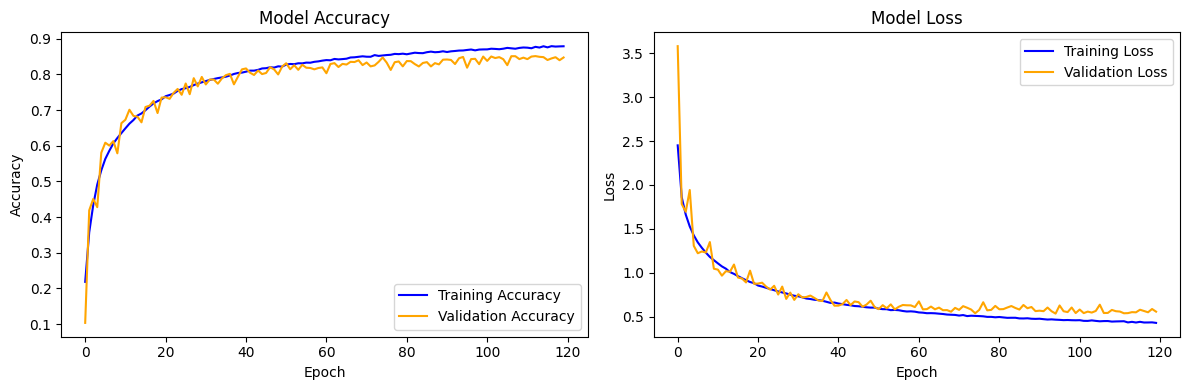

In [95]:
best_epoch_idx = sup_hist_2.history['val_accuracy'].index(max(sup_hist_2.history['val_accuracy']))

print(f"--- Model 3: Best Results based on val accuracy ---")
print(f"Valid Acc:  {sup_hist_2.history['val_accuracy'][best_epoch_idx]:.4f}")
print(f"Train Acc:  {sup_hist_2.history['accuracy'][best_epoch_idx]:.4f}")
print(f"Valid Loss: {sup_hist_2.history['val_loss'][best_epoch_idx]:.4f}")
print(f"Train Loss: {sup_hist_2.history['loss'][best_epoch_idx]:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(sup_hist_2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(sup_hist_2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sup_hist_2.history['loss'], label='Training Loss', color='blue')
plt.plot(sup_hist_2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

--- Model 3: Best Results based on val accuracy ---
Valid Acc:  0.8084
Train Acc:  0.8034
Valid Loss: 0.6157
Train Loss: 0.6261


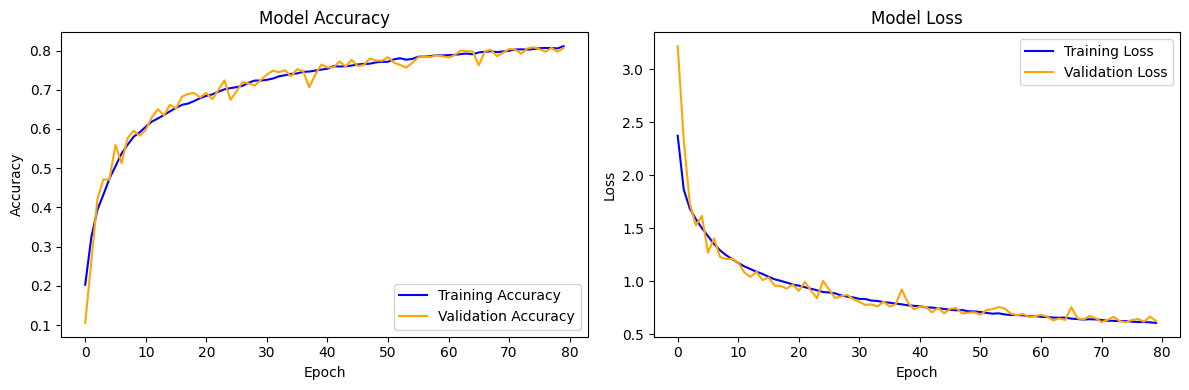

In [90]:
best_epoch_idx = sup_hist_2.history['val_accuracy'].index(max(sup_hist_2.history['val_accuracy']))

print(f"--- Model 3: Best Results based on val accuracy ---")
print(f"Valid Acc:  {sup_hist_2.history['val_accuracy'][best_epoch_idx]:.4f}")
print(f"Train Acc:  {sup_hist_2.history['accuracy'][best_epoch_idx]:.4f}")
print(f"Valid Loss: {sup_hist_2.history['val_loss'][best_epoch_idx]:.4f}")
print(f"Train Loss: {sup_hist_2.history['loss'][best_epoch_idx]:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(sup_hist_2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(sup_hist_2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sup_hist_2.history['loss'], label='Training Loss', color='blue')
plt.plot(sup_hist_2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
best_epoch_idx = sup_hist_2.history['val_accuracy'].index(max(sup_hist_2.history['val_accuracy']))

print(f"--- Model 3: Best Results based on val accuracy ---")
print(f"Valid Acc:  {sup_hist_2.history['val_accuracy'][best_epoch_idx]:.4f}")
print(f"Train Acc:  {sup_hist_2.history['accuracy'][best_epoch_idx]:.4f}")
print(f"Valid Loss: {sup_hist_2.history['val_loss'][best_epoch_idx]:.4f}")
print(f"Train Loss: {sup_hist_2.history['loss'][best_epoch_idx]:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(sup_hist_2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(sup_hist_2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sup_hist_2.history['loss'], label='Training Loss', color='blue')
plt.plot(sup_hist_2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**ONE OF TOP CANDIDATE: ACHIEVED 90%+ ON TRAINING**

--- Model 3: Best Results based on val accuracy ---
Valid Acc:  0.8624
Train Acc:  0.9370
Valid Loss: 0.7882
Train Loss: 0.5128


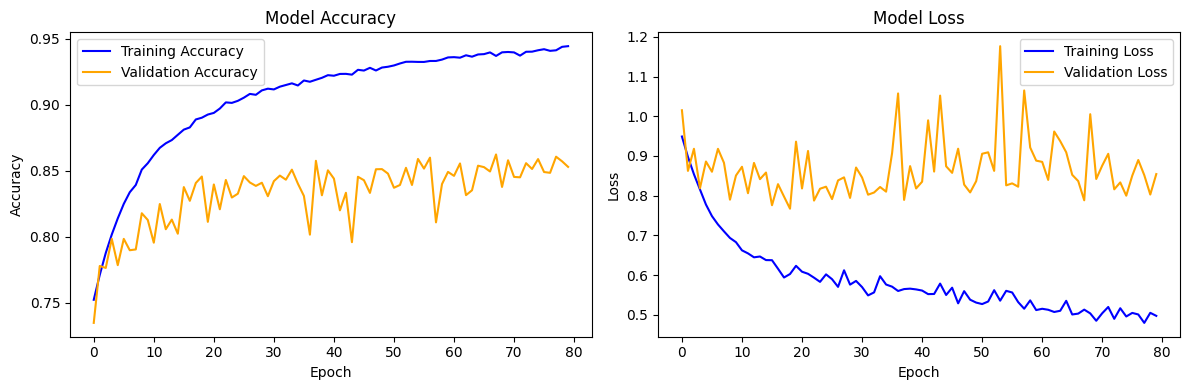

In [85]:
best_epoch_idx = sup_hist_2.history['val_accuracy'].index(max(sup_hist_2.history['val_accuracy']))

print(f"--- Model 3: Best Results based on val accuracy ---")
print(f"Valid Acc:  {sup_hist_2.history['val_accuracy'][best_epoch_idx]:.4f}")
print(f"Train Acc:  {sup_hist_2.history['accuracy'][best_epoch_idx]:.4f}")
print(f"Valid Loss: {sup_hist_2.history['val_loss'][best_epoch_idx]:.4f}")
print(f"Train Loss: {sup_hist_2.history['loss'][best_epoch_idx]:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(sup_hist_2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(sup_hist_2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sup_hist_2.history['loss'], label='Training Loss', color='blue')
plt.plot(sup_hist_2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**ONE OF TOP CANDIDATE: ACHIEVED 90%+ ON TRAINING**

--- Model 3: Best Results based on val accuracy ---
Valid Acc:  0.8752
Train Acc:  0.9051
Valid Loss: 0.7986
Train Loss: 0.6697


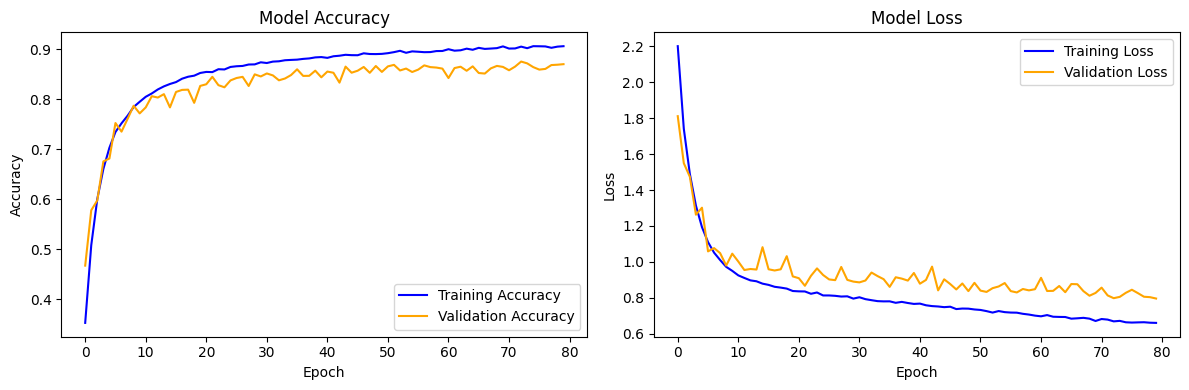

In [81]:
best_epoch_idx = sup_hist_2.history['val_accuracy'].index(max(sup_hist_2.history['val_accuracy']))

print(f"--- Model 3: Best Results based on val accuracy ---")
print(f"Valid Acc:  {sup_hist_2.history['val_accuracy'][best_epoch_idx]:.4f}")
print(f"Train Acc:  {sup_hist_2.history['accuracy'][best_epoch_idx]:.4f}")
print(f"Valid Loss: {sup_hist_2.history['val_loss'][best_epoch_idx]:.4f}")
print(f"Train Loss: {sup_hist_2.history['loss'][best_epoch_idx]:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(sup_hist_2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(sup_hist_2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sup_hist_2.history['loss'], label='Training Loss', color='blue')
plt.plot(sup_hist_2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**ONE OF TOP CANDIDATE: ACHIEVED 90%+ ON TRAINING**

--- Model 3: Best Results based on val accuracy ---
Valid Acc:  0.8556
Train Acc:  0.9199
Valid Loss: 0.6268
Train Loss: 0.3376


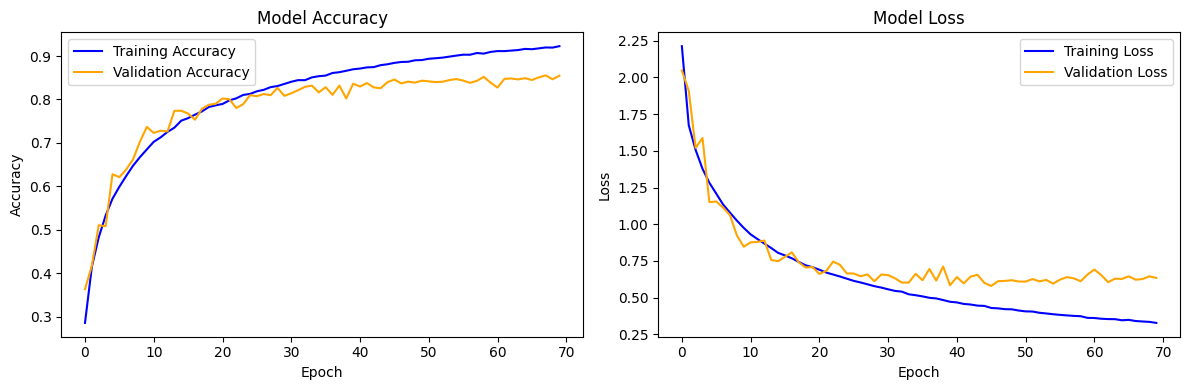

In [76]:
best_epoch_idx = sup_hist_2.history['val_accuracy'].index(max(sup_hist_2.history['val_accuracy']))

print(f"--- Model 3: Best Results based on val accuracy ---")
print(f"Valid Acc:  {sup_hist_2.history['val_accuracy'][best_epoch_idx]:.4f}")
print(f"Train Acc:  {sup_hist_2.history['accuracy'][best_epoch_idx]:.4f}")
print(f"Valid Loss: {sup_hist_2.history['val_loss'][best_epoch_idx]:.4f}")
print(f"Train Loss: {sup_hist_2.history['loss'][best_epoch_idx]:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(sup_hist_2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(sup_hist_2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sup_hist_2.history['loss'], label='Training Loss', color='blue')
plt.plot(sup_hist_2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

--- Model 3: Best Results based on val accuracy ---
Valid Acc:  0.8612
Train Acc:  0.8907
Valid Loss: 0.8191
Train Loss: 0.6954


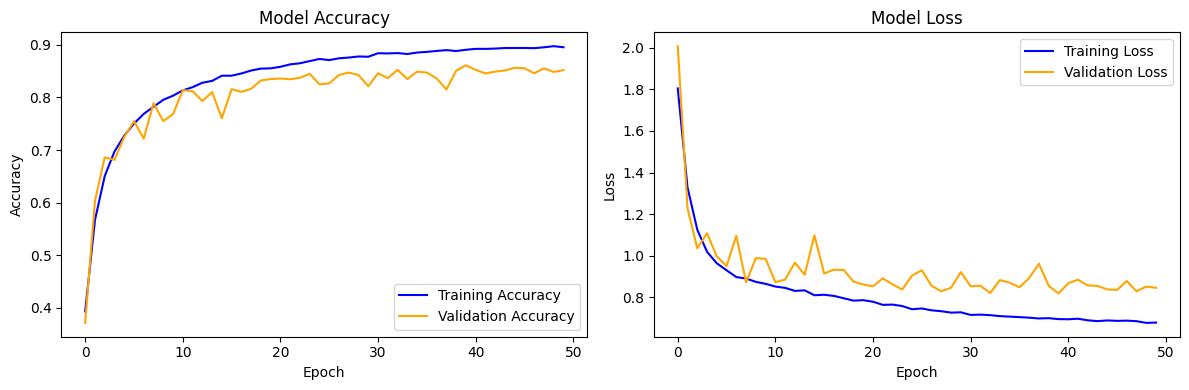

In [73]:
best_epoch_idx = sup_hist_2.history['val_accuracy'].index(max(sup_hist_2.history['val_accuracy']))

print(f"--- Model 3: Best Results based on val accuracy ---")
print(f"Valid Acc:  {sup_hist_2.history['val_accuracy'][best_epoch_idx]:.4f}")
print(f"Train Acc:  {sup_hist_2.history['accuracy'][best_epoch_idx]:.4f}")
print(f"Valid Loss: {sup_hist_2.history['val_loss'][best_epoch_idx]:.4f}")
print(f"Train Loss: {sup_hist_2.history['loss'][best_epoch_idx]:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(sup_hist_2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(sup_hist_2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sup_hist_2.history['loss'], label='Training Loss', color='blue')
plt.plot(sup_hist_2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**ONE OF TOP CANDIDATE: ACHIEVED FAIRLY EQUAL RESULTS ON BOTH SETS**

--- Model 3: Best Results based on val accuracy ---
Valid Acc:  0.8400
Train Acc:  0.8436
Valid Loss: 0.5837
Train Loss: 0.5594


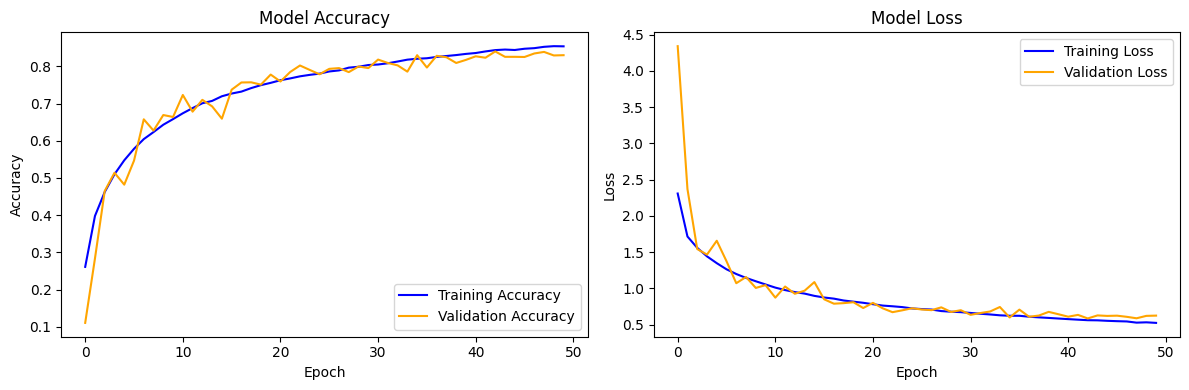

In [70]:
best_epoch_idx = sup_hist_2.history['val_accuracy'].index(max(sup_hist_2.history['val_accuracy']))

print(f"--- Model 3: Best Results based on val accuracy ---")
print(f"Valid Acc:  {sup_hist_2.history['val_accuracy'][best_epoch_idx]:.4f}")
print(f"Train Acc:  {sup_hist_2.history['accuracy'][best_epoch_idx]:.4f}")
print(f"Valid Loss: {sup_hist_2.history['val_loss'][best_epoch_idx]:.4f}")
print(f"Train Loss: {sup_hist_2.history['loss'][best_epoch_idx]:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(sup_hist_2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(sup_hist_2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sup_hist_2.history['loss'], label='Training Loss', color='blue')
plt.plot(sup_hist_2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

--- Model 3: Best Results based on val accuracy ---
Valid Acc:  0.8447
Train Acc:      0.8654
Valid Loss:     0.4813
Train Loss:     0.4006


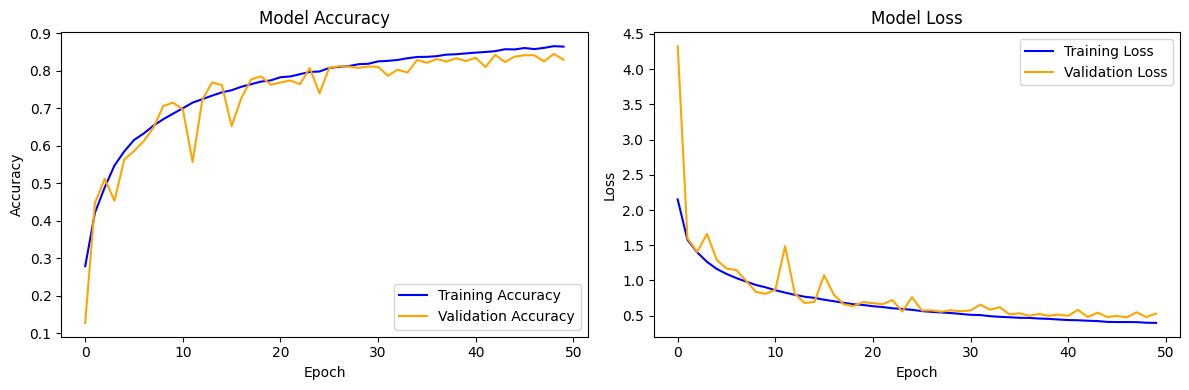

In [ ]:
best_epoch_idx = sup_hist_2.history['val_accuracy'].index(max(sup_hist_2.history['val_accuracy']))

print(f"--- Model 3: Best Results based on val accuracy ---")
print(f"Valid Acc:  {sup_hist_2.history['val_accuracy'][best_epoch_idx]:.4f}")
print(f"Train Acc:  {sup_hist_2.history['accuracy'][best_epoch_idx]:.4f}")
print(f"Valid Loss: {sup_hist_2.history['val_loss'][best_epoch_idx]:.4f}")
print(f"Train Loss: {sup_hist_2.history['loss'][best_epoch_idx]:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(sup_hist_2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(sup_hist_2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sup_hist_2.history['loss'], label='Training Loss', color='blue')
plt.plot(sup_hist_2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**ONE OF TOP CANDIDATE: ACHIEVED 90%+ ON TRAINING BUT SHOWED SIGNS OF OVERFITTING**

--- Model 3: Best Results based on val accuracy ---
Max Valid Acc:  0.8702
Train Acc:      0.9627
Valid Loss:     0.5559
Train Loss:     0.1154


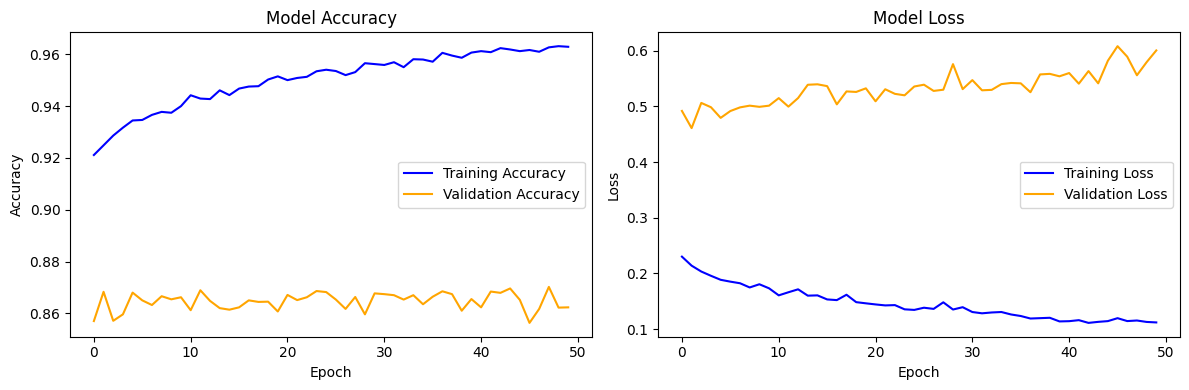

In [ ]:
best_epoch_idx = sup_hist_2.history['val_accuracy'].index(max(sup_hist_2.history['val_accuracy']))

print(f"--- Model 3: Best Results based on val accuracy ---")
print(f"Valid Acc:  {sup_hist_2.history['val_accuracy'][best_epoch_idx]:.4f}")
print(f"Train Acc:      {sup_hist_2.history['accuracy'][best_epoch_idx]:.4f}")
print(f"Valid Loss:     {sup_hist_2.history['val_loss'][best_epoch_idx]:.4f}")
print(f"Train Loss:     {sup_hist_2.history['loss'][best_epoch_idx]:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(sup_hist_2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(sup_hist_2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sup_hist_2.history['loss'], label='Training Loss', color='blue')
plt.plot(sup_hist_2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


--- Model 3: Supplementary Revised ---
Final Train Acc: 0.8998
Final Valid Acc: 0.8452
Final Train Loss: 0.3421
Final Valid Loss: 0.5511


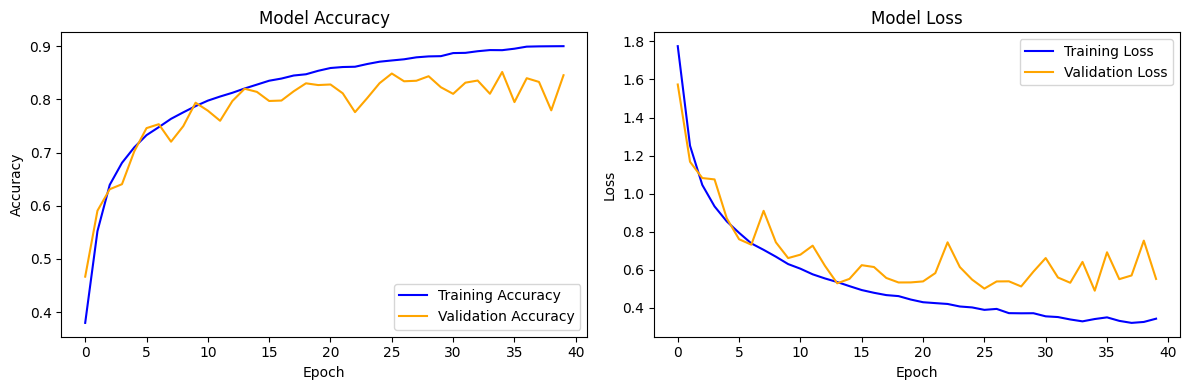

In [ ]:
print("\n--- Model 3: Supplementary Revised ---")
print(f"Final Train Acc: {sup_hist_2.history['accuracy'][-1]:.4f}")
print(f"Final Valid Acc: {sup_hist_2.history['val_accuracy'][-1]:.4f}")
print(f"Final Train Loss: {sup_hist_2.history['loss'][-1]:.4f}")
print(f"Final Valid Loss: {sup_hist_2.history['val_loss'][-1]:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(sup_hist_2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(sup_hist_2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sup_hist_2.history['loss'], label='Training Loss', color='blue')
plt.plot(sup_hist_2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**ONE OF TOP CANDIDATE: ACHIEVED 90%+ ON TRAINING BUT SHOWED SIGNS OF OVERFITTING**


--- Model 3: Supplementary Revised ---
Final Train Acc: 0.9139
Final Valid Acc: 0.8488
Final Train Loss: 0.2646
Final Valid Loss: 0.5100


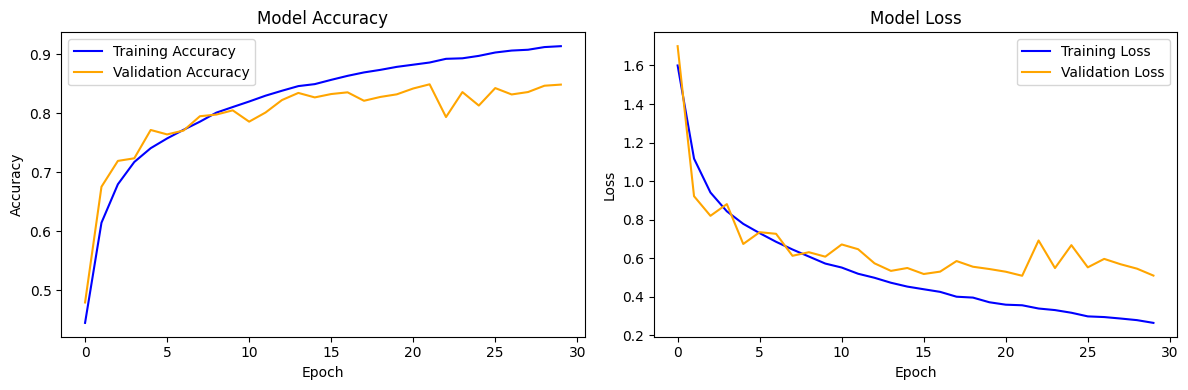

In [ ]:
print("\n--- Model 3: Supplementary Revised ---")
print(f"Final Train Acc: {sup_hist_2.history['accuracy'][-1]:.4f}")
print(f"Final Valid Acc: {sup_hist_2.history['val_accuracy'][-1]:.4f}")
print(f"Final Train Loss: {sup_hist_2.history['loss'][-1]:.4f}")
print(f"Final Valid Loss: {sup_hist_2.history['val_loss'][-1]:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(sup_hist_2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(sup_hist_2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sup_hist_2.history['loss'], label='Training Loss', color='blue')
plt.plot(sup_hist_2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### Conclusion

# To conclude the following activity, it was all about the use of Convolutional Neural Network (CNN) with use of the Cifar-10 dataset which is an image classification dataset. There are two main ojectives for the activity which is to build and train a CNN which what has been accomplished. In here the CNN was built using a sequential model wherein the .add() function is used in order to build up the blocks of the CNN with the use of Conv2D. There are two things that was a built under here which is the Conv2D() which contains the actual convolutional layers now and strides which is like a sliding window in that scans the datas under the provided frame which is initialized in the first inputs such as the 32, (5,5). Regularization and other techniques was used in the procedures such as the dropout in order to train the model and the output of it immediately is around 0.6 while the supplementary initially based on the instruction is near 0.7 with it being better by 6% from the procedures.

# The supplementary on the otherhand is where is becomes different. With the goal of achieving 90% on both train and test set, only the training set was able to achieve the 90% mark with it even getting closer to 95% while the test set is hard capped at 85 to 87%. Various technique was applied here such as adding more block on the overall network from the previous one there is only 1 to 2 blocks of conv+conv+pool I increased it to the max of 4 blocks since more than 5 will result on just 1x1 since every pooling, it is being halved so having more than 5 blocks will not be great. I also added the BatchNormalization which boosted the accuracy and lessen the overfitting along with the L2 regularization that also lessened the overfit in combination of achieveing a higher accuracy. Lastly is that I increased and sometimes decreased the amount of dense layer, epoch, learning rate, and batch size but all in all the validation set cannot go any further on the hard cap of 87% accuracy

# In short, with the added regularization techniques applied for the second part of the supplementary. Only the training set achieved a 90-95% accuracy while the validation set only achieved a hard cap of 85-87% accuracy, all of which having a fairly balanced loss as well.